In [2]:
%pylab inline
import scipy.special

Populating the interactive namespace from numpy and matplotlib


In [11]:
class ratmoving:
    
    def __init__(self,n,L):
        self.n=n #linear dimension
        self.L=L #lenght of the grid
        self.N=n*n
        self.sigma=1*float(L/n)
        self.c=1*float(L/n)*5 #cutoff
        self.grid=zeros((pow(n,2),2))
        self.J=zeros((n*n,n*n))
        self.hebbJ=zeros((n*n,n*n))
        self.V=zeros(n*n)
    
    
    def ambient(self,l):#n=square root of number of neurons, l=randomness ,L dimension
        for i in range(self.n):
            for j in range(self.n):
                self.grid[self.n*i+j][0]=random.uniform(float(self.L)/float(self.n)*(i-l/2),float(self.L)/float(self.n)*(i+l/2))
                self.grid[self.n*i+j][1]=random.uniform(float(self.L)/float(self.n)*(j-l/2),float(self.L)/float(self.n)*(j+l/2))
        return         
    
    def computeV(self,currentposition):
        for i in range(self.N):
                self.V[i]=kernel(self.grid[i],currentposition,self.sigma,rat.c)
    
    def strenght(self,currentposition,eta):
        deltaJ=zeros((self.N,self.N))
        for i in range(self.N):
            for j in range(self.N):
                if j!=i:
                    deltaJ[i][j]=eta*(self.V[i])*(self.V[j])
                else:
                    deltaJ[i][j]=0
                    
        for i in range(self.N):
            for j in range(self.N):
                self.J[i][j]=self.J[i][j]+deltaJ[i][j]
        self.J=self.J/norm(self.J)
                
    def learn(self,path,eta,A):
        et=eta
        t=path.shape[0]
        m=zeros(t)
        for s in range(t):
            self.computeV(path[s])
            self.strenght(path[s],et/pow(s+1,0.3))
            m[s]=overlap(self.J,A)
            if s%100==0:
                print(s)
        plot(np.arange(t),m)
        xlabel('t')
        ylabel('overlap')
        show()
        return m
           
            
    
    def zerostrenght(self):
        for i in range(self.N):
            for j in range(self.N):
                self.J[i][j]=random.randint(0,10,size=1)
        self.J=self.J/norm(self.J)
       
        
    def hebbstrenght(self):
        for i in range(self.N):
            for j in range(self.N):
                self.hebbJ[i][j]=kernel(self.grid[i],self.grid[j],self.sigma,self.c)
        self.hebbJ=self.hebbJ/norm(self.hebbJ)
        

    def random_trajectory(self,t):#x=storage position vector, t=time steps
        x=zeros((t,2))
        col=arange(t)
        x[0][0]=random.uniform(0,self.L)
        x[0][1]=random.uniform(0,self.L)
        #x[0][0]=0.1
        #x[0][1]=0.1
        theta=zeros(t)
        theta[0]=random.uniform(0,2*pi)
        
        for i in range(1,t):
            x[i][0]=x[i-1][0]+0.5*(self.L/float(self.n))*cos(theta[i-1])
            x[i][1]=x[i-1][1]+0.5*(self.L/float(self.n))*sin(theta[i-1])
            theta[i]=random.normal(theta[i-1],pi/2,1)    
            
            if logical_or(x[i][0]>self.L,x[i][0]<0):
                theta[i-1]=pi-theta[i-1]
                x[i][0]=x[i-1][0]+0.5*(self.L/float(self.n))*cos(theta[i-1])
            if logical_or(x[i][1]>self.L,x[i][1]<0):
                theta[i-1]=-theta[i-1]
                x[i][1]=x[i-1][1]+0.5*(self.L/float(self.n))*sin(theta[i-1])
        #scatter(x.T[0],x.T[1],c=col,cmap=cm.jet)        
        return x   
            
        #suggerimento per sviluppi futuri:moto ordinato se probabilità di tirare +1 è 1 e le altre zero, compatibilmente con valore di posizione.
        
        
    def ordered_trajectory(self,t):
        x[0][0]=random.randint(0,self.N)
        x[0][1]=random.randint(0,self.N)
        while (x[i][0]==self.n and i<t):
            x[i+1][0]=x[i][0]+random.choice([-1,0,1],size=1,p=[1/3,1/3,1/3])
            x[i+1][1]=x[i][1]
            
    def sample_regular_grid(self,epochs):
        x=[]
        pos=np.zeros((self.N,2))
        for i in range(self.n):
            for j in range(self.n):
                pos[self.n*i+j][0]=i*(self.L/float(self.n))
                pos[self.n*i+j][1]=j*(self.L/float(self.n))
        for e in range(epochs):
            np.random.shuffle(pos)
            x.append(pos)
        return np.asarray(x).reshape((self.N*epochs,2))
    
   
        


In [40]:
def kernel(r_i,r_r,sig,c):#r_i=position on the grid,r_r=rat position,sig=standard deviation,c=cutoff
        V=0.0  
        dx=0
        dy=0
        d=0
        dx=abs(r_i[0]-r_r[0])
        dy=abs(r_i[1]-r_r[1])
        d=sqrt(pow(dx,2)+pow(dy,2))
        if d<=c:
            #V=sqrt(2/(pi*pow(sig,2)))*float(1/erf(float(c)/sqrt(2*pow(sig,2))))*exp(-0.5*pow(d/sig,2))
            V=exp(-0.5*pow(d/sig,2))
        else:
            V=0    
        return V
    
def overlap(matA,matB):
    m=0
    for i in range(matA.shape[0]):
        for j in range(matA.shape[0]):
                m=m+matA[i][j]*matB[i][j]
    m=m/float(norm(matA)*norm(matB))
    return m

In [41]:
rat=ratmoving(10,100)
rat.ambient(0.5)

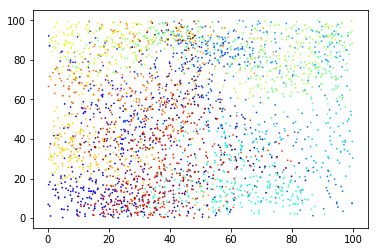

In [42]:
rand=rat.random_trajectory(3000)
col=arange(3000)
scatter(rand.T[0],rand.T[1],s=1/2,c=col,cmap=cm.jet)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900


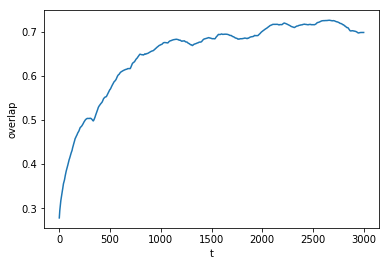

array([0.2779234 , 0.28221275, 0.28595478, ..., 0.69867216, 0.69871193,
       0.69874378])

In [43]:
rat.hebbstrenght()
rat.zerostrenght()
#A=rat.J
#print(overlap(rat.J,A))
#x=rat.sample_regular_grid(35)
#rat.computeV(x[2])
#rat.V
#rat.learn(x,0.01,rat.hebbJ)
  
rat.learn(rand,0.01,rat.hebbJ)

In [44]:
pos_matrix=rat.grid.reshape((rat.n,rat.n,2))
pos_matrix

array([[[-0.60907932, -0.26582295],
        [-1.30461915, 10.05314065],
        [ 2.1251496 , 21.75056456],
        [-1.04792901, 32.16259314],
        [-0.73946311, 40.47170431],
        [-0.9962088 , 51.38404005],
        [ 0.15918174, 62.28925549],
        [-1.2903235 , 69.21515151],
        [ 2.10241637, 81.85665325],
        [-0.29474176, 91.66622044]],

       [[10.37301853,  0.48072564],
        [11.07816188,  8.83346569],
        [12.31926251, 19.1055067 ],
        [12.32452213, 27.75734242],
        [10.24515903, 38.92275849],
        [ 7.9457129 , 50.13085383],
        [11.2175698 , 59.54902084],
        [10.36438197, 68.49151214],
        [12.2746536 , 80.17343032],
        [ 8.16908041, 90.65504776]],

       [[21.8935223 , -1.23317989],
        [21.56839211, 12.28812391],
        [21.82750691, 19.18650555],
        [21.15432418, 29.30057794],
        [22.30837545, 39.08222979],
        [19.03445177, 50.67256259],
        [17.77733176, 61.51543754],
        [19.22653155, 70

In [45]:
def distance(r_1,r_2):
    dx=0
    dy=0
    d=0
    dx=abs(r_1[0]-r_2[0])
    dy=abs(r_1[1]-r_2[1])
    d=sqrt(pow(dx,2)+pow(dy,2))
    return d

In [46]:
distances=zeros((rat.N,rat.N))

In [51]:
for i in range(rat.N):
    for j in range(rat.N):
        if j!=i:
            distances[i][j]=distance(rat.grid[i],rat.grid[j])

In [52]:
distances

array([[  0.        ,  10.34237813,  22.18552066, ..., 113.9266888 ,
        122.90521494, 128.77125394],
       [ 10.34237813,   0.        ,  12.18987448, ..., 108.42468928,
        116.92019348, 122.22433955],
       [ 22.18552066,  12.18987448,   0.        , ...,  99.38834131,
        107.36436514, 112.12021809],
       ...,
       [113.9266888 , 108.42468928,  99.38834131, ...,   0.        ,
         10.88462207,  20.52391303],
       [122.90521494, 116.92019348, 107.36436514, ...,  10.88462207,
          0.        ,  10.07018071],
       [128.77125394, 122.22433955, 112.12021809, ...,  20.52391303,
         10.07018071,   0.        ]])

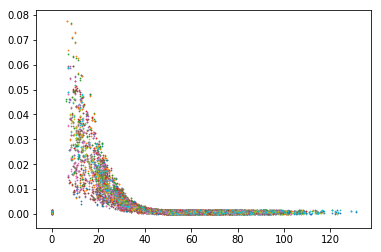

In [63]:
for i in range(rat.N):
    scatter(distances[i],rat.J[i],s=1/2)
    


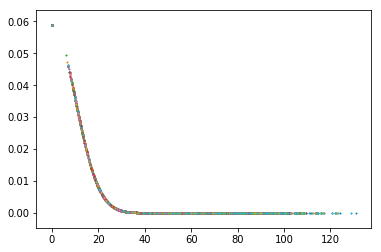

In [64]:
for i in range(rat.N):
    scatter(distances[i],rat.hebbJ[i],s=1/2)

array([[0.00049568, 0.00669608, 0.00504177, ..., 0.00033045, 0.00148703,
        0.00099135],
       [0.00653086, 0.00049568, 0.01160555, ..., 0.00033045, 0.00099135,
        0.00049568],
       [0.00454609, 0.01094464, 0.0006609 , ..., 0.00016523, 0.00016523,
        0.00132181],
       ...,
       [0.00115658, 0.00082613, 0.00082613, ..., 0.00082613, 0.02564671,
        0.01264126],
       [0.        , 0.00033045, 0.00082613, ..., 0.02614239, 0.00016523,
        0.02796185],
       [0.00115658, 0.00082613, 0.00049568, ..., 0.01379784, 0.02796185,
        0.00115658]])